<a href="https://colab.research.google.com/github/yunju-1118/EWHA/blob/2025-1-Statistical-Methods-for-Big-Data-Analysis/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HW#4 - 2329031 정윤주**
##**Problem 1. Short Question**

**(a) CNN 모델은 크게 3가지 종류의 층으로 구성된다. 3가지 층에 대하여 그 이름과 각 층의
역할에 대해 서술하시오.**

CNN 모델은 **Convolution layer, Pooling layer, Fully-connected layer**로 구성된다. Convolution layer는 일정한 사이즈로 입력된 데이터를 구분한 후 필터와 곱연산을 통해 특성 맵을 추출한다. 이후, pooling layer에서는 지정한 사이즈로 구분해 각 구역당 max pooling 또는 average pooling 하나만을 남겨 크기를 축소한다. 마지막으로 Fuly connected layer에서는 flatten된 데이터에서 각 클래스에 속할 확률을 계산한다.

**(b) 합성곱 층(convolutional layer)의 2가지 핵심 파라미터에 대해 서술하시오.**

**filters**와 **kernel_size**이다. filters의 경우 몇 개의 filter를 이용할지 결정하고, kernel_size는 filter의 사이즈를 결정한다.

**(c) 딥러닝 모델에서 이미지를 분석하기 위해서는 이미지 데이터를 컴퓨터가 이해할 수 있는 형태로 변환하는 과정이 필요하다. 이 과정에 대해 서술하시오.**

이미지를 pixel 단위로 나누어 각 pixel의 값을 [0,255] 사이의 숫자로 변환한 후, matrix로 변환함으로써 컴퓨터가 이해할 수 있는 형태로 변환한다. 컬러 이미지의 경우 각 pixel의 값을 RGB를 이용해 3가지 숫자로 나눈다. 즉, 컴퓨터에서는 3차원 data matrix를 인식하게 된다.

**(d) 이미지가 filter를 지나가면서 input size와 output size가 달라지거나 그대로 유지된다. 이미
지의 input size와 output size가 같아지도록 만드는 convolution layer의 hyper-parameter에 대
해 서술하시오.**

input size와 output size를 동일하게 만드는 하이퍼 파라미터는 **padding**이다. padding은 이미지의 가장자리에 0을 추가하여 이미지가 down scale 되는 것을 막고 input size와 output size를 동일하게 만든다. padding을 하지 않을 경우 convolution layer를 거칠수록 feature map의 크기는 감소한다.

## **Problem2. MNIST**

**(a) Keras에 내장된 mnist dataset을 불러들인 후 train data와 test data로 분리하시오.**

In [ ]:
# import library
import sys
import tensorflow as tf
from tensorflow.keras import layers

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
(x_train, y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (60000, 28, 28)
y_train : (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)


**(b) 이미지를 model에 넣기 위해 각 pixel의 값을 숫자로 변형시키는 전처리 과정을 수행하고,
data normalization을 하시오.**

In [ ]:
img_rows = 28
img_cols = 28

input_shape = (img_rows, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1).astype('float32')

# normalization
x_train /= 255
x_test /= 255

**(c) 필요한 변수에 대하여 one-hot encoding을 하시오.**

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**(d) 딥러닝 모델을 정의할 때 모델의 하이퍼 파라미터는 모델의 성능에 영향을 준다. 따라서,
좋은 성능의 모델을 찾기 위해선 은닉층의 개수, 층마다 있는 뉴런의 개수, 각 층에서 사용하는 활성화 함수, 가중치 초기화, 에포트, 배치 사이즈 등 다양한 하이퍼 파라미터에
변화를 주며 최적의 조합을 찾아내야 한다. Keras를 이용하여 모델을 정의하도록 하며, 위에서 언급한 하이퍼 파라미터의 설정에 변화를 주어 각각 다른 5개의 모델을 정의하시오.
이때, 모든 모델은 pooling layer를 반드시 포함하며, 적어도 하나의 모델은 drop out을 하이
퍼 파라미터로 설정하시오. (모델에 대한 코드를 반드시 첨부할 것.)**

In [ ]:
model1 = keras.Sequential([
  layers.Conv2D(32, kernel_size = (5, 5), strides = 1, activation = 'relu',
                input_shape = input_shape),
  layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
  layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu'),
  layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(10, activation = 'softmax')
])

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1,
                 validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 84ms/step - accuracy: 0.7665 - loss: 0.7524 - val_accuracy: 0.9758 - val_loss: 0.0857
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 82ms/step - accuracy: 0.9645 - loss: 0.1228 - val_accuracy: 0.9815 - val_loss: 0.0633
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 84ms/step - accuracy: 0.9729 - loss: 0.0914 - val_accuracy: 0.9852 - val_loss: 0.0453
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 82ms/step - accuracy: 0.9773 - loss: 0.0744 - val_accuracy: 0.9875 - val_loss: 0.0388
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.9810 - loss: 0.0648 - val_accuracy: 0.9881 - val_loss: 0.0386
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 81ms/step - accuracy: 0.9829 - loss: 0.0556 - val_accuracy: 0.9895 - val_loss: 0.0333
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 78ms/step - accuracy: 0.9852 - loss: 0.0500 - val_accuracy: 0.9889 - val_loss: 0.0298
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 77ms/step - accuracy: 0.9855 - loss: 0.0471 - 

In [ ]:
model2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 62ms/step - accuracy: 0.8764 - loss: 0.4302 - val_accuracy: 0.9758 - val_loss: 0.0804
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 57ms/step - accuracy: 0.9776 - loss: 0.0776 - val_accuracy: 0.9802 - val_loss: 0.0625
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.9858 - loss: 0.0484 - val_accuracy: 0.9820 - val_loss: 0.0529
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.9911 - loss: 0.0323 - val_accuracy: 0.9842 - val_loss: 0.0479
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9934 - loss: 0.0231 - val_accuracy: 0.9844 - val_loss: 0.0481


In [ ]:
model3 = Sequential([
    Conv2D(64, (3, 3), activation='tanh', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='tanh'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3.fit(x_train, y_train, epochs=7, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/7
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 89ms/step - accuracy: 0.9019 - loss: 0.3437 - val_accuracy: 0.9839 - val_loss: 0.0545
Epoch 2/7
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.9867 - loss: 0.0481 - val_accuracy: 0.9869 - val_loss: 0.0433
Epoch 3/7
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.9912 - loss: 0.0304 - val_accuracy: 0.9888 - val_loss: 0.0342
Epoch 4/7
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 86ms/step - accuracy: 0.9935 - loss: 0.0232 - val_accuracy: 0.9891 - val_loss: 0.0339
Epoch 5/7
938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 91ms/step - accuracy: 0.9946 - loss: 0.0181 - val_accuracy: 0.9873 - val_loss: 0.0393
Epoch 6/7
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 90ms/step - accuracy: 0.9963 - loss: 0.0134 - val_accuracy: 0.9870 - val_loss: 0.0427
Epoch 7/7
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 89ms/step - accuracy: 0.9972 - loss: 0.0112 - val_accuracy: 0.9868 - val_loss: 0.0409


In [ ]:
# drop out 포함
model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model4.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test, y_test))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.8327 - loss: 0.5584 - val_accuracy: 0.9749 - val_loss: 0.0818
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 34s 57ms/step - accuracy: 0.9615 - loss: 0.1305 - val_accuracy: 0.9808 - val_loss: 0.0593
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.9699 - loss: 0.0985 - val_accuracy: 0.9836 - val_loss: 0.0499
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9753 - loss: 0.0804 - val_accuracy: 0.9839 - val_loss: 0.0497
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.9779 - loss: 0.0731 - val_accuracy: 0.9859 - val_loss: 0.0432
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9800 - loss: 0.0635 - val_accuracy: 0.9862 - val_loss: 0.0390
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - accuracy: 0.9816 - loss: 0.0574 - val_accuracy: 0.9852 - val_loss: 0.0434
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - accuracy: 0.9844 - loss: 0.0483 - 

In [ ]:
model5 = Sequential([
    Conv2D(16, (3, 3), activation='sigmoid', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model5.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.5021 - loss: 1.5619 - val_accuracy: 0.9099 - val_loss: 0.3328
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9101 - loss: 0.3213 - val_accuracy: 0.9217 - val_loss: 0.2615
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9249 - loss: 0.2533 - val_accuracy: 0.9319 - val_loss: 0.2263
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9359 - loss: 0.2159 - val_accuracy: 0.9454 - val_loss: 0.1925
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9452 - loss: 0.1820 - val_accuracy: 0.9479 - val_loss: 0.1773


**(e) (d)의 결과에 대하여 모델별로 confution matrix를 구하시오. 어떤 모델의 성능이 가장 좋은
가?**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred1 = model1.predict(x_test)
ypred_class = np.argmax(y_pred1, axis=1)
ytest_class = np.argmax(y_test, axis=1)

cf1 = confusion_matrix(ytest_class, ypred_class)
print('model1:\n', cf1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
model1:
 [[ 975    0    0    0    1    0    2    1    1    0]
 [   0 1132    1    0    0    0    1    1    0    0]
 [   0    3 1019    0    2    0    1    5    2    0]
 [   0    0    2 1002    0    2    0    4    0    0]
 [   0    0    0    0  974    0    1    0    2    5]
 [   1    0    0    4    0  884    1    1    1    0]
 [   1    2    0    0    1    1  953    0    0    0]
 [   0    1    4    3    0    1    0 1018    1    0]
 [   2    1    2    1    1    0    2    3  958    4]
 [   1    0    0    1    3    5    0    5    2  992]]


In [ ]:
y_pred2 = model2.predict(x_test)
ypred_class = np.argmax(y_pred2, axis=1)
ytest_class = np.argmax(y_test, axis=1)

cf2 = confusion_matrix(ytest_class, ypred_class)
print('model1:\n', cf2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
model1:
 [[ 972    0    3    0    0    2    1    1    0    1]
 [   0 1129    1    1    1    0    1    1    1    0]
 [   2    4  999   13    2    0    2    7    2    1]
 [   0    0    0 1006    0    1    0    2    1    0]
 [   0    0    0    0  975    0    0    0    0    7]
 [   1    0    0    6    0  883    1    0    1    0]
 [   8    2    1    1    1    3  940    0    2    0]
 [   0    2    8    1    1    0    0 1007    1    8]
 [   6    0    2    7    3    4    0    2  938   12]
 [   1    1    0    2    7    1    0    2    0  995]]


In [ ]:
y_pred3 = model3.predict(x_test)
ypred_class = np.argmax(y_pred3, axis=1)
ytest_class = np.argmax(y_test, axis=1)

cf3 = confusion_matrix(ytest_class, ypred_class)
print('model1:\n', cf3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
model1:
 [[ 974    0    2    0    0    0    1    1    2    0]
 [   0 1123    0    3    0    0    3    4    2    0]
 [   0    0 1017    3    0    0    0    3    9    0]
 [   0    0    1 1005    0    0    0    0    3    1]
 [   0    0    1    0  966    0    3    1    4    7]
 [   1    0    1   11    0  867    4    0    5    3]
 [   3    1    1    0    1    1  948    0    3    0]
 [   0    0    7    2    0    0    0 1013    2    4]
 [   1    0    1    4    0    2    0    2  964    0]
 [   2    0    0    4    1    3    0    0    8  991]]


In [ ]:
y_pred4 = model4.predict(x_test)
ypred_class = np.argmax(y_pred4, axis=1)
ytest_class = np.argmax(y_test, axis=1)

cf4 = confusion_matrix(ytest_class, ypred_class)
print('model1:\n', cf4)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
model1:
 [[ 976    1    0    0    0    0    1    1    1    0]
 [   0 1131    2    0    0    0    2    0    0    0]
 [   1    3 1018    1    1    0    1    6    1    0]
 [   0    0    0  999    0    3    0    5    3    0]
 [   0    0    0    0  973    0    4    0    1    4]
 [   1    0    0    5    0  883    3    0    0    0]
 [   5    2    0    1    3    1  945    0    1    0]
 [   1    2    8    0    0    0    0 1015    1    1]
 [   3    1    1    3    2    0    0    3  956    5]
 [   3    2    0    5   12    5    0    5    2  975]]


In [ ]:
y_pred5 = model5.predict(x_test)
ypred_class = np.argmax(y_pred5, axis=1)
ytest_class = np.argmax(y_test, axis=1)

cf5 = confusion_matrix(ytest_class, ypred_class)
print('model1:\n', cf5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
model1:
 [[ 965    0    2    1    0    2    6    2    1    1]
 [   0 1116    5    3    1    1    4    0    5    0]
 [   6    1  971   15    5    1    5    9   16    3]
 [   1    0   25  940    1    5    3   11   12   12]
 [   1    1    7    0  931    0    8    4    2   28]
 [   7    0    1   26    8  797   15    8   20   10]
 [   6    2    3    1    3    4  935    2    2    0]
 [   3    5   27    4    3    0    0  964    2   20]
 [   6    1    9   11    6    5   10    6  913    7]
 [   6    5    1    7   23    2    1   12    5  947]]


confusion matrix를 확인했을 때, model1의 성능이 가장 뛰어난 것으로 확인할 수 있다.

**(f) (d)에서 정의한 모델 중 하나를 선택하여 callback option을 설정하여 학습을 진행할 것이다.
epoch=100, batch_size=32으로 설정한 후, Call back option을 사용하여 model의 accuracy가 20
번 동안 좋아지지 않으면 학습을 멈추도록 설정하시오. 또한, training history를 시각화하여
plot을 첨부하시오.**

In [ ]:
model1 = keras.Sequential([
  layers.Conv2D(32, kernel_size = (5, 5), strides = 1, activation = 'relu',
                input_shape = input_shape),
  layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
  layers.Conv2D(64, kernel_size = (2, 2), activation = 'relu'),
  layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(10, activation = 'softmax')
])

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1,
                 validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 81ms/step - accuracy: 0.7497 - loss: 0.7904 - val_accuracy: 0.9759 - val_loss: 0.0824
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 85ms/step - accuracy: 0.9652 - loss: 0.1139 - val_accuracy: 0.9838 - val_loss: 0.0519
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 79ms/step - accuracy: 0.9759 - loss: 0.0823 - val_accuracy: 0.9856 - val_loss: 0.0446
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - accuracy: 0.9794 - loss: 0.0660 - val_accuracy: 0.9882 - val_loss: 0.0381
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.9818 - loss: 0.0603 - val_accuracy: 0.9882 - val_loss: 0.0358
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.9832 - loss: 0.0535 - val_accuracy: 0.9900 - val_loss: 0.0322
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 81ms/step - accuracy: 0.9841 - loss: 0.0506 - val_accuracy: 0.9896 - val_loss: 0.0309
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.9854 - loss: 0.0446 - 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

es = EarlyStopping(monitor='val_accuracy', patience=20)

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test),
                     callbacks=[es], verbose=1)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.9851 - loss: 0.0487 - val_accuracy: 0.9893 - val_loss: 0.0316
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.9853 - loss: 0.0451 - val_accuracy: 0.9917 - val_loss: 0.0246
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9860 - loss: 0.0424 - val_accuracy: 0.9904 - val_loss: 0.0279
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9870 - loss: 0.0410 - val_accuracy: 0.9923 - val_loss: 0.0241
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.9875 - loss: 0.0389 - val_accuracy: 0.9897 - val_loss: 0.0300
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9887 - loss: 0.0351 - val_accuracy: 0.9921 - val_loss: 0.0214
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9887 - loss: 0.0360 - val_accuracy: 0.9922 - val_loss: 0.0251
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 

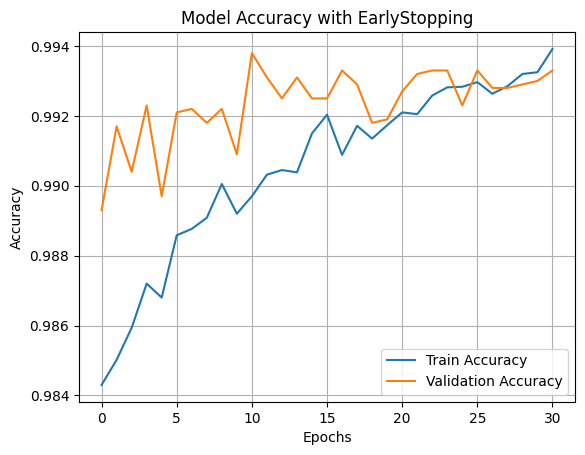

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with EarlyStopping')
plt.legend()
plt.grid(True)
plt.show()